# Name: SHUBHASH A V T

## Intern at GRIP @ The Spark Foundation

# Task 1 - To predict the percentage of an student based on the no. of study hours.

In [ ]:
# Importing requried libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the dataset (CSV FILE)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student_scores - student_scores.csv')

## Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.shape

(25, 2)

Inferences:
1. The data contains 25 rows and 2 columns (Hours, Scores)
2. There no null values in the data.
3. Both are numerical columns (integer and float)

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Inferences:
The summary shows the quantail, max, min, mean, standard deveation of the data, and using the above we can asses that there is no outlier in the data, everything seems significant so far.

In [ ]:
# Head of data (first 5 values of data)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Checking for outliers

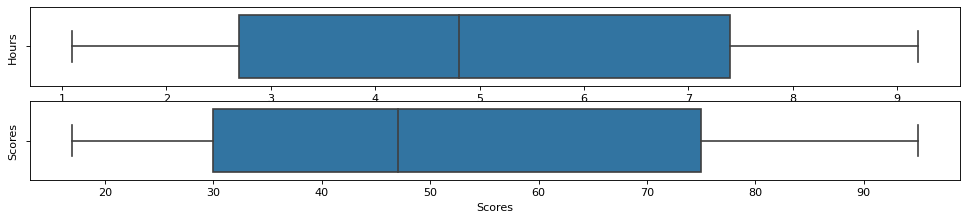

In [ ]:
plt.figure(figsize=(15,20), dpi=80)
for i,col in enumerate(df.columns,1):
  plt.subplot(13,1,i)
  sns.boxplot(df[col])
  plt.ylabel(col)
plt.show()

As we can observe the box plot that there is no outliers present in the data.

## DATA VISUALIZATION

Visualization is a strong tool to understand the data, and its influence on our target variable (Score),Both are numerical columns, so we can use line graph, scatter plot, LM Plot, Reg Plot, etc,.

<Figure size 1200x400 with 0 Axes>

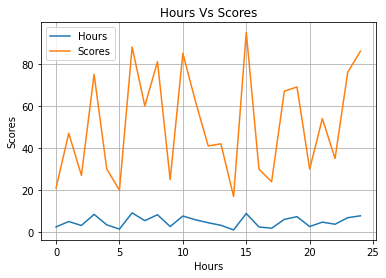

In [ ]:
plt.figure(figsize=(15,5), dpi=80)
df.plot(kind='line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title("Hours Vs Scores")
plt.grid()
plt.show()

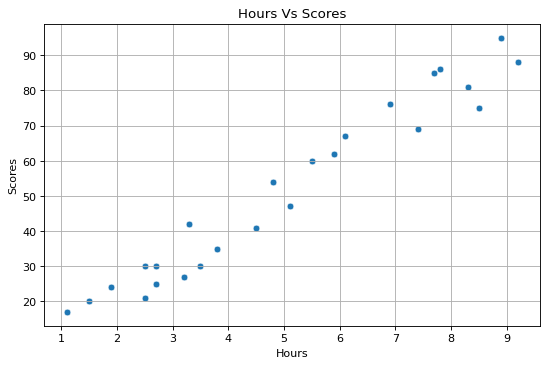

In [ ]:
plt.figure(figsize=(8,5), dpi=80)
sns.scatterplot(df['Hours'], df['Scores'])
plt.title("Hours Vs Scores")
plt.grid()
plt.show()

Inferences:
The scatter plot shows that
1. When the no. of hours increases the score increases, they both are directly propostional.
2. we can plot a heatmap of corelation between the variables to know about the relations between them.

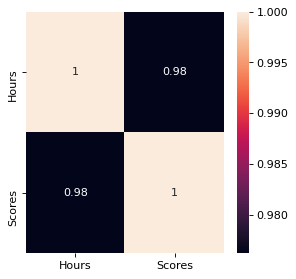

In [ ]:
plt.figure(figsize=(4,4), dpi=80)
sns.heatmap(df.corr(), annot=True)
plt.show()

Inferences:
Scores and Hours have Highly positively corelated with each other, it implies when the No. of hours study increases the exam score increases. 

## Linear Regression

Prediction And Evaluation of model

In [ ]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr = LinearRegression()

lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)

print('r2-Train:', r2_score(y_train, y_train_pred))
print('rmsc-Train:', np.sqrt(mean_squared_error(y_train,y_train_pred)))
      
y_test_pred = lr.predict(X_test)
      
print('\nr2-Test:', r2_score(y_test, y_test_pred))
print('rmsc-Test:', np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2-Train: 0.9491209376364416
rmsc-Train: 5.608461065868858

r2-Test: 0.9678055545167994
rmsc-Test: 4.352380006653288


Inferences:
1. R-Squared value and RMSE are the matrics used for evaualuating the model, we can see both the test and train score 
2. R2 value for the train is 0.94 indiactes that the variance captured by the Regressor is about 94% and in test is 96%, so our model is predicting well.
3. The Root Mean Squard error is the matrics used to evaulaute the error, as the test error is less compared to train. 

In [ ]:
pd.DataFrame(lr.coef_,  columns=['coefficients'])

,coefficients
0,9.682078


Inferences:
The coefficient value 9.6 indicates if 1 hour is spend for studying there is a increase of 9.6 score.

Actual vs Predicted

In [ ]:
y_pred = lr.predict(X)
actual_Predict = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
actual_Predict.head()

,Actual,Predicted
0,21,27.032088
1,47,52.205491
2,27,33.809542
3,75,85.124557
4,30,36.714166


Predicted score if a student studies for 9.25 hrs/ day

In [ ]:
predicted_score = lr.predict([[9.25]])
print('Predicted score for 9.25 hour study time per day is',round(predicted_score[0],2))

Predicted score for 9.25 hour study time per day is 92.39
